In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes_dataset.csv


In [55]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes_dataset.csv')

In [56]:
df

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,32,3,23.00,102.3,62.0,4.1,109.3,47.8,76.7,86.8,115.0,0.75,0,0,0,0,0
9534,74,0,24.29,125.8,93.0,5.3,95.8,66.6,103.7,90.1,94.3,0.96,1,0,0,1,1
9535,75,6,26.10,107.6,75.0,5.0,168.5,62.3,149.8,84.0,114.9,0.73,0,0,0,1,0
9536,52,1,25.88,99.3,96.0,4.6,70.0,48.4,122.9,97.5,88.7,1.10,1,0,0,0,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

In [58]:
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [59]:
df.drop('LDL', axis = 1)

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,32,3,23.00,102.3,62.0,4.1,47.8,76.7,86.8,115.0,0.75,0,0,0,0,0
9534,74,0,24.29,125.8,93.0,5.3,66.6,103.7,90.1,94.3,0.96,1,0,0,1,1
9535,75,6,26.10,107.6,75.0,5.0,62.3,149.8,84.0,114.9,0.73,0,0,0,1,0
9536,52,1,25.88,99.3,96.0,4.6,48.4,122.9,97.5,88.7,1.10,1,0,0,0,1


In [60]:
df.median

<bound method DataFrame.median of       Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0      69            5  28.39    130.1           77.0    5.4  130.4  44.0   
1      32            1  26.49    116.5           72.0    4.5   87.4  54.2   
2      89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3      78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4      38            8  24.56    103.2           74.0    4.7  102.5  29.1   
...   ...          ...    ...      ...            ...    ...    ...   ...   
9533   32            3  23.00    102.3           62.0    4.1  109.3  47.8   
9534   74            0  24.29    125.8           93.0    5.3   95.8  66.6   
9535   75            6  26.10    107.6           75.0    5.0  168.5  62.3   
9536   52            1  25.88     99.3           96.0    4.6   70.0  48.4   
9537   33            3  25.61     69.1           65.0    4.0   69.0  59.4   

      Triglycerides  WaistCircumference  

In [61]:
df.mode

<bound method DataFrame.mode of       Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0      69            5  28.39    130.1           77.0    5.4  130.4  44.0   
1      32            1  26.49    116.5           72.0    4.5   87.4  54.2   
2      89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3      78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4      38            8  24.56    103.2           74.0    4.7  102.5  29.1   
...   ...          ...    ...      ...            ...    ...    ...   ...   
9533   32            3  23.00    102.3           62.0    4.1  109.3  47.8   
9534   74            0  24.29    125.8           93.0    5.3   95.8  66.6   
9535   75            6  26.10    107.6           75.0    5.0  168.5  62.3   
9536   52            1  25.88     99.3           96.0    4.6   70.0  48.4   
9537   33            3  25.61     69.1           65.0    4.0   69.0  59.4   

      Triglycerides  WaistCircumference  Hi

In [62]:
df.nunique 

<bound method DataFrame.nunique of       Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0      69            5  28.39    130.1           77.0    5.4  130.4  44.0   
1      32            1  26.49    116.5           72.0    4.5   87.4  54.2   
2      89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3      78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4      38            8  24.56    103.2           74.0    4.7  102.5  29.1   
...   ...          ...    ...      ...            ...    ...    ...   ...   
9533   32            3  23.00    102.3           62.0    4.1  109.3  47.8   
9534   74            0  24.29    125.8           93.0    5.3   95.8  66.6   
9535   75            6  26.10    107.6           75.0    5.0  168.5  62.3   
9536   52            1  25.88     99.3           96.0    4.6   70.0  48.4   
9537   33            3  25.61     69.1           65.0    4.0   69.0  59.4   

      Triglycerides  WaistCircumference 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


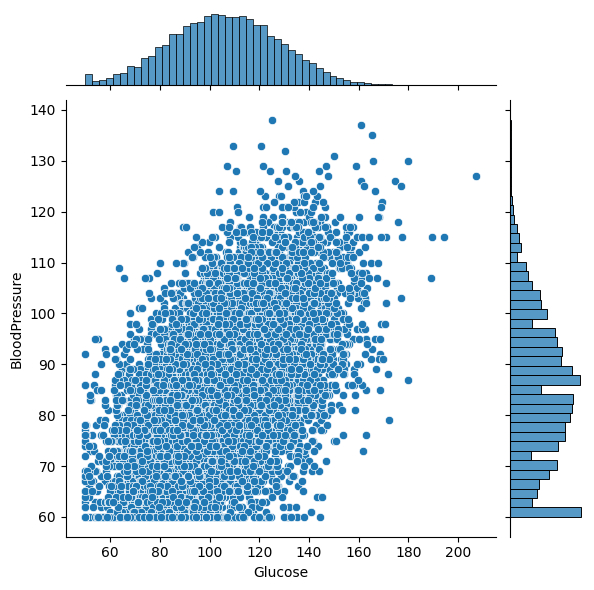

In [63]:
sns.jointplot(x = 'Glucose' , y = 'BloodPressure', data=df)

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

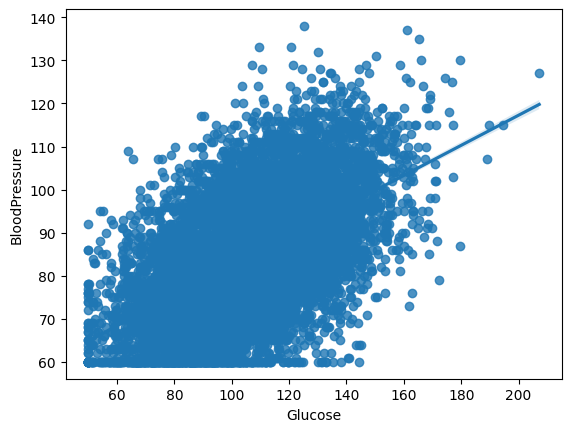

In [64]:
sns.regplot(x = 'Glucose' , y = 'BloodPressure', data=df)